# Task 1 - Parameter Testing
- Single output neuron, standard synapse model, Oja rule.

In [37]:
import numpy as np 
import matplotlib.pyplot as plt
import numpy.random as random

from itertools import product
from collections import namedtuple

plt.rcParams.update({'font.size': 14})
pltaspect = (4,3)

In [38]:
def add_arrow(line, position=None, direction='right', size=15, color=None):
    """
    add an arrow to a line.

    line:       Line2D object
    position:   x-position of the arrow. If None, mean of xdata is taken
    direction:  'left' or 'right'
    size:       size of the arrow in fontsize points
    color:      if None, line color is taken.
    """
    if color is None:
        color = line.get_color()

    xdata = line.get_xdata()
    ydata = line.get_ydata()

    if position is None:
        position = xdata.mean()
    # find closest index
    start_ind = np.argmin(np.absolute(xdata - position))
    if direction == 'right':
        end_ind = start_ind + 1
    else:
        end_ind = start_ind - 1

    line.axes.annotate('',
        xytext=(xdata[start_ind], ydata[start_ind]),
        xy=(xdata[end_ind], ydata[end_ind]),
        arrowprops=dict(arrowstyle="->", color=color),
        size=size
    )

In [39]:
N = 10 # number of presynaptic neurons
w0 = random.randn(N)/np.sqrt(N) # weight vector
e1 = random.randn(N, 1) # first principal component of covariance
e1 = e1 / np.sqrt(e1.T.dot(e1))
e2 = random.randn(N, 1) 
e2 = e2 - (e2.T.dot(e1).item()/e1.T.dot(e1).item())*e1 # second principal component of covariance
e2 = e2 / np.sqrt(e2.T.dot(e2))
a = 0.1
C = e1.dot(e1.T) + a * np.identity(N) # covariance matrix
mu = np.zeros(N) # mean
tau_w = 300 # time constant for weight updates
T = 3000 # total simulation time
dt = 0.01 # time step length
alpha = 1

parameters = dict(
    tau_w=[3, 30, 300],
    a=[0.1, 0.5, 1]
)

Run = namedtuple('Run', parameters.keys())



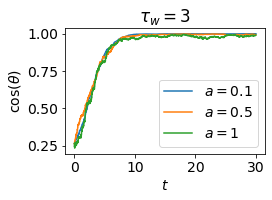

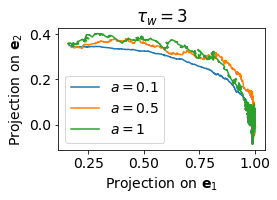

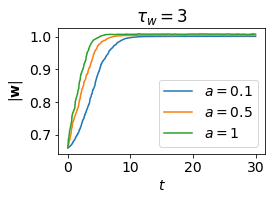

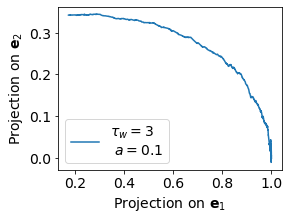

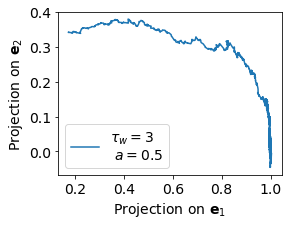

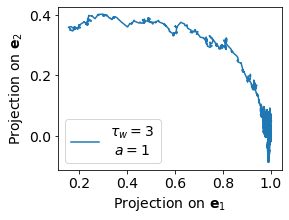

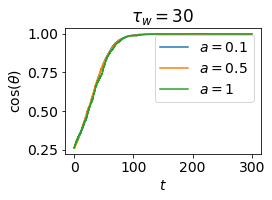

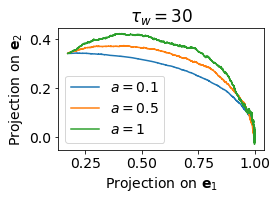

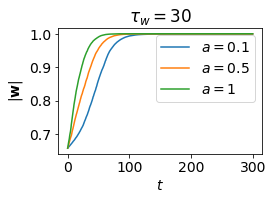

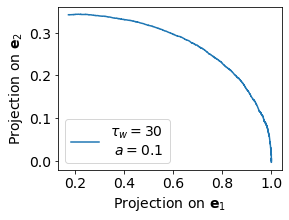

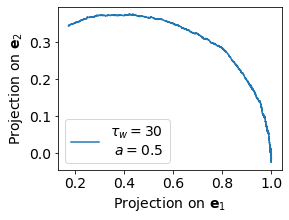

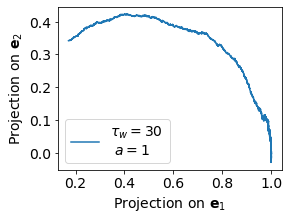

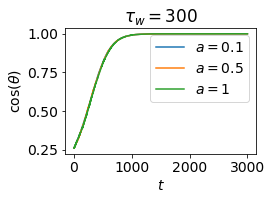

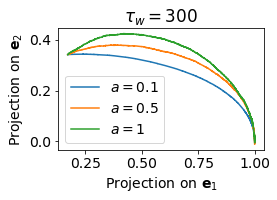

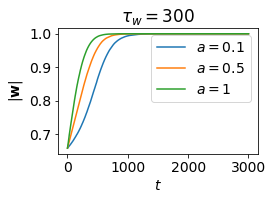

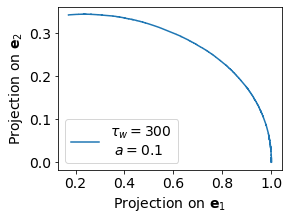

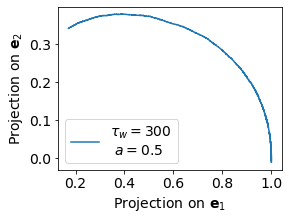

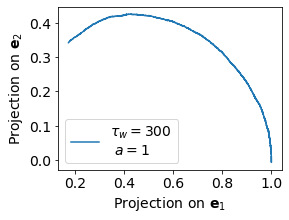

In [40]:
i = 10000
# for v in product(*parameters.values()):

#     run = (Run(*v))
#     tau_w = run.tau_w
#     a = run.a

w0 = random.randn(N)/np.sqrt(N) # weight vector initialisation

for tau_w in parameters['tau_w']:

    for a in parameters['a']:

        C = e1.dot(e1.T) + a * np.identity(N) # covariance matrix

        U = []
        W = []
        W_norm = []
        w = w0

        for t in np.arange(0, 10 * tau_w, dt):
            u = random.multivariate_normal(mu, C)
            v = u.dot(w)
            w = w + dt * (1/tau_w) * (v*u - alpha*(v**2)*w)
            U.append(u)
            W.append(w)
            W_norm.append(np.sqrt(w.T.dot(w)))

        U = np.array(U)
        W = np.array(W)
        W_norm = np.array(W_norm)

        W1 = W.dot(e1)/np.sqrt(e1.T.dot(e1))
        W2 = W.dot(e2)/np.sqrt(e2.T.dot(e2))

        plt.figure(int(tau_w), figsize = pltaspect)
        plt.tight_layout()
        plt.plot(
            np.arange(0, 10 * tau_w, dt), 
            (W1.squeeze()/W_norm), label = '$a=${}'.format(a)
            )
        plt.xlabel('$t$')
        plt.ylabel('$\cos(\\theta)$')
        plt.title('$\\tau_w=${}'.format(tau_w))
        plt.legend()

        plt.figure(int(tau_w) + 1, figsize = pltaspect)
        plt.plot(W1, W2, label = '$a=${}'.format(a))  
        plt.xlabel('Projection on $\mathbf{e}_1$')
        plt.ylabel('Projection on $\mathbf{e}_2$')
        plt.title('$\\tau_w=${}'.format(tau_w))
        plt.legend()

        plt.figure(int(tau_w) + 2, figsize = pltaspect)
        plt.plot(
            np.arange(0, 10 * tau_w, dt), 
            W_norm, label = '$a=${}'.format(a)
            )
        plt.xlabel('$t$')
        plt.ylabel('$|\mathbf{w}|$')
        plt.title('$\\tau_w=${}'.format(tau_w))
        plt.legend()

        plt.figure(i, figsize = pltaspect)
        plt.plot(W1, W2)
        plt.xlabel('Projection on $\mathbf{e}_1$')
        plt.ylabel('Projection on $\mathbf{e}_2$')
        plt.legend(['$\\tau_w=${} \n $a=${}'.format(tau_w, a)])
        i += 1

    plt.figure(int(tau_w))
    plt.tight_layout()
    plt.savefig('figures/prep/1.{}.pdf'.format(tau_w), bbox_inches = 'tight')
    plt.figure(int(tau_w) + 1)
    plt.tight_layout()
    plt.savefig('figures/prep/2.{}.pdf'.format(tau_w), bbox_inches = 'tight')
    plt.figure(int(tau_w) + 2)
    plt.tight_layout()
    plt.savefig('figures/prep/3.{}.pdf'.format(tau_w), bbox_inches = 'tight')